In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nf
from netCDF4 import Dataset
%matplotlib inline

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
datapath="/work/FAC/FGSE/IDYST/tbeucler/default/saranya/Data/ECMWF/ERA5_25kmx3hr/"
target="/work/FAC/FGSE/IDYST/tbeucler/default/saranya/causal/create_ts/outputs/2016/"
p1="/work/FAC/FGSE/IDYST/tbeucler/default/saranya/causal/create_ts/"

In [3]:
!ls /work/FAC/FGSE/IDYST/tbeucler/default/saranya/causal/create_ts/2016/

20160809_nio.csv  dianmu_wp.csv   ivette_ep.csv    madeline_ep.csv
20160816_nio.csv  earl_na.csv	  javier_ep.csv    malou_wp.csv
20160822_wp.csv   fiona_na.csv	  kay_ep.csv	   mindulle_wp.csv
20160827_na.csv   gaston_na.csv   kompasu_wp.csv   namtheun_wp.csv
chanthu_wp.csv	  hermine_na.csv  lester_ep.csv    newton_ep.csv
conson_wp.csv	  howard_ep.csv   lionrock_wp.csv  omais_wp.csv


In [4]:
dm1=xr.open_dataset(datapath+'/shear/shear_850_250_2016.nc')


In [5]:
dm2=xr.open_dataset(datapath+'/vor/vor_2016.nc')
dm3=xr.open_dataset(datapath+'/rhum/rhum_2016.nc')

In [6]:
dm3

<xarray.Dataset>
Dimensions:  (time: 2928, lon: 1440, lat: 721, plev: 21)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 ... 2016-12-31T21:00:00
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * plev     (plev) float64 1e+03 2e+03 3e+03 5e+03 ... 9.5e+04 9.75e+04 1e+05
Data variables:
    var157   (time, plev, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Fri Dec 17 14:25:09 2021: cdo -f nc copy GRIB_files/rh_2016...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

In [79]:
#dm0=dm0.ws10[0:55,:,:]#for it in range(tc_irad.shape[0]):
   # latn, lats, lone, lonw = tc_irad[it,:]
    
    #dw10m[it,:,:]=dm0[it,:,:].sel(lat=slice(latn,lats),lon=slice(lone,lonw))[0:40,0:40]
    #ws[it]=np.max(dw10m[it,:,:])
    lev = 600 = 12, lev 850 = 15, lev 200=7
    

In [75]:
#nio tracks use latitude longitude instead of lat lon
track=pd.read_csv(p1+'2016/omais_wp.csv',delimiter=r",")
lon1=track['lon'].to_numpy()
lat1=track['lat'].to_numpy()
pos = arr = np.stack((lat1, lon1), axis=1)
pos.shape

(79, 2)

In [76]:
#for North Atlantic
lonx=np.mod(lon1,360)
pos = arr = np.stack((lat1, lonx), axis=1)
pos.shape

(79, 2)

In [77]:
pos

array([[ 16.7   , 148.8   ],
       [ 16.6926, 148.49  ],
       [ 16.7   , 148.2   ],
       [ 16.7475, 147.955 ],
       [ 16.9   , 147.8   ],
       [ 17.25  , 147.747 ],
       [ 17.58  , 147.82  ],
       [ 17.66  , 147.996 ],
       [ 17.7143, 148.186 ],
       [ 17.86  , 148.315 ],
       [ 18.05  , 148.4   ],
       [ 18.2175, 148.486 ],
       [ 18.4   , 148.55  ],
       [ 18.6212, 148.594 ],
       [ 18.8556, 148.622 ],
       [ 19.0625, 148.592 ],
       [ 19.225 , 148.267 ],
       [ 19.4004, 148.011 ],
       [ 19.6333, 147.773 ],
       [ 19.95  , 147.555 ],
       [ 20.35  , 147.45  ],
       [ 20.8112, 147.415 ],
       [ 21.325 , 147.425 ],
       [ 21.8738, 147.459 ],
       [ 22.4   , 147.5   ],
       [ 22.8162, 147.507 ],
       [ 23.225 , 147.525 ],
       [ 23.7338, 147.607 ],
       [ 24.25  , 147.675 ],
       [ 24.6819, 147.649 ],
       [ 25.125 , 147.6   ],
       [ 25.645 , 147.613 ],
       [ 26.225 , 147.6   ],
       [ 26.8512, 147.512 ],
       [ 27.5 

In [79]:
dm01=dm1.shear[1716:1795]
dm02=dm2.var138[1716:1795,7]
dm03=dm2.var138[1716:1795,12]
dm04=dm2.var138[1716:1795,15]
dm05=dm3.var157[1716:1795,7]
dm06=dm3.var157[1716:1795,12]
dm07=dm3.var157[1716:1795,15]

In [80]:
tc_irad=np.empty((pos.shape[0],4))
tc_irad[:,0] = pos[:,0]-2
tc_irad[:,1] = pos[:,0]+2
tc_irad[:,2] = pos[:,1]-2
tc_irad[:,3] = pos[:,1]+2

tc_orad=np.empty((pos.shape[0],4))
tc_orad[:,0] = pos[:,0]-8
tc_orad[:,1] = pos[:,0]+8
tc_orad[:,2] = pos[:,1]-8
tc_orad[:,3] = pos[:,1]+8

In [81]:
ws10=np.zeros((pos.shape[0],64,64))
dv200=np.zeros((pos.shape[0],64,64))
dv600=np.zeros((pos.shape[0],64,64))
dv850=np.zeros((pos.shape[0],64,64))
dh200=np.zeros((pos.shape[0],64,64))
dh600=np.zeros((pos.shape[0],64,64))
dh850=np.zeros((pos.shape[0],64,64))

In [82]:
dd100=np.zeros((pos.shape[0],64,64))

In [83]:
lonselect = dm01.lon.sel(lon=slice(tc_orad[0,:][2],tc_orad[0,:][3])).data
latselect = np.flipud(dm01.lat.sel(lat=slice(tc_orad[0,:][1],tc_orad[0,:][0])).data)
lon2d,lat2d = np.meshgrid(lonselect,latselect)

In [84]:
def createmask(irad=None):
    mask = []
    for ti in range(len(tc_irad)):
        lonselect = dm01.lon.sel(lon=slice(tc_orad[ti,:][2],tc_orad[ti,:][3])).data
        latselect = np.flipud(dm01.lat.sel(lat=slice(tc_orad[ti,:][1],tc_orad[ti,:][0])).data)
        if (lonselect.shape != 64) or (latselect.shape != 64):
            lon2d,lat2d = np.meshgrid(lonselect[0:64],latselect[0:64])
        else:
            lon2d,lat2d = np.meshgrid(lonselect,latselect)
        #############################################################################################
        latcriteria = np.logical_and(lat2d>irad[ti][0],lat2d<irad[ti][1])
        loncriteria = np.logical_and(lon2d>irad[ti][2],lon2d<irad[ti][3])
        allcriteria = np.logical_and(loncriteria,latcriteria)
        mask.append(allcriteria)

    return mask
mymask = createmask(irad=tc_irad)

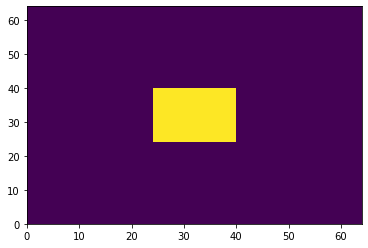

In [85]:
import matplotlib.pyplot as plt
plt.pcolormesh(mymask[0])

In [86]:
vname=["outshear850-200", "out_vor200","out_vor600","out_vor850","out_hum200","out_hum600","out_hum850"]

In [87]:
for it in range(tc_orad.shape[0]):
    latn, lats, lone, lonw = tc_orad[it,:]
    ws10[it,:,:]=dm01[it,:,:].sel(lat=slice(lats,latn),lon=slice(lone,lonw))[0:64,0:64]
    dv200[it,:,:]=dm02[it,:,:].sel(lat=slice(lats,latn),lon=slice(lone,lonw))[0:64,0:64]
    dv600[it,:,:]=dm03[it,:,:].sel(lat=slice(lats,latn),lon=slice(lone,lonw))[0:64,0:64]
    dv850[it,:,:]=dm04[it,:,:].sel(lat=slice(lats,latn),lon=slice(lone,lonw))[0:64,0:64]
    dh200[it,:,:]=dm05[it,:,:].sel(lat=slice(lats,latn),lon=slice(lone,lonw))[0:64,0:64]
    dh600[it,:,:]=dm06[it,:,:].sel(lat=slice(lats,latn),lon=slice(lone,lonw))[0:64,0:64]
    dh850[it,:,:]=dm07[it,:,:].sel(lat=slice(lats,latn),lon=slice(lone,lonw))[0:64,0:64]
    

In [88]:
varlist = [ws10,dv200,dv600,dv850,dh200,dh600,dh850]
tempdict = {}
for ind,obj in enumerate(varlist):
    templist = [obj[i,...][~mymask[i]] for i in range(len(mymask))]
    tempdict[vname[ind]] = templist

In [89]:
out_timeseries_dict = {}
for ind,obj in enumerate(vname):
    out_timeseries_dict[obj] = [np.nanmean(obj) for obj in tempdict[obj]]

In [90]:
out_ts=pd.DataFrame.from_dict(out_timeseries_dict)

In [91]:
out_ts

,outshear850-200,out_vor200,out_vor600,out_vor850,out_hum200,out_hum600,out_hum850
0,11.078478,-0.000012,0.000008,0.000012,78.284381,71.674457,81.225831
1,11.492680,-0.000011,0.000007,0.000011,76.723553,69.743345,81.756753
2,12.218215,-0.000011,0.000006,0.000011,73.832465,68.748891,82.162686
3,12.418110,-0.000011,0.000005,0.000011,72.495076,68.796234,82.162046
4,13.396696,-0.000009,0.000004,0.000012,72.947745,68.634878,81.196472
...,...,...,...,...,...,...,...
74,23.305706,-0.000009,0.000014,0.000016,13.640012,44.242616,73.846600
75,23.594343,-0.000004,0.000010,0.000011,13.279376,46.278851,72.798096
76,22.963628,0.000007,0.000011,0.000010,12.558904,45.614630,73.488895
77,22.688881,0.000009,0.000017,0.000012,11.998059,45.539635,72.024930


In [92]:
out_ts.to_csv(target+'2016_outer_wp_omais.csv')